In [3]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
import math
import tensorflow as tf
import pandas as pd 
%matplotlib inline
%config InlineBackend.figure_format='retina'

rcParams['figure.figsize'] = 14, 10
register_matplotlib_converters()
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)


In [5]:
path = os.getcwd()
files = os.listdir(path)
files_xls = [f for f in files if f[-3:] == "xls"] # save the excel file names

## Get the data from excel files

In [6]:
data_sp = pd.DataFrame()
for file in files_xls : 
    if (file[-6:-4] == "sp") : # get juste the spring data during 2021
    #  df = pd.read_excel(file)
    #  data_sp.join(df)
        data_sp = pd.concat([data_sp, pd.read_excel(file, "Data",usecols=["DATE-TIME","SM (0-5cm)","Temp 2.5cm"], header=1)], axis=1)

#get only srping data
data_sp = data_sp.drop(0, axis=0) # drop units row
data_sp =  data_sp.iloc[:, [i for i in range(data_sp.shape[1]) if i not in [3,6,9,12]]] # drop useless columns
data_sp.columns = ['DATE-TIME', 'SM1', 'Temp1', 'SM2', 'Temp2','SM3', 'Temp3','SM4', 'Temp4','SM5', 'Temp5']


In [7]:
data_sp.describe()

C:\Users\asus\AppData\Local\Temp\ipykernel_10604\1393068345.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_sp.describe()


,DATE-TIME,SM1,Temp1,SM2,Temp2,SM3,Temp3,SM4,Temp4,SM5,Temp5
count,6552,6552.0,6552.0,6552.000000,6552.000000,6552.000000,6552.000000,6552.000000,6552.000000,6552.000000,6552.000000
unique,6552,6330.0,4654.0,6546.000000,3858.000000,6528.000000,4839.000000,6527.000000,5176.000000,6517.000000,4920.000000
top,2020-09-01 00:00:00,-99.0,-99.0,31.550662,19.000835,11.028078,12.368751,11.976325,16.395449,13.348556,34.957787
freq,1,70.0,70.0,2.000000,11.000000,4.000000,7.000000,4.000000,6.000000,9.000000,9.000000
first,2020-09-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-11-30 23:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#get rid of outranged soil moisture values like -99
last_measure = 0
for index , row in data_sp.iterrows() : 
    if row.SM1 > 0 :
         last_measure = row.SM1
    else :
        data_sp.at[index, "SM1"] = last_measure


In [9]:
#get rid of outranged temperature values like -99

last_measure = 0
for index , row in data_sp.iterrows() : 
    if row.Temp1 > 0 :
         last_measure = row.Temp1
    else :
        data_sp.at[index, "Temp1"] = last_measure

In [10]:
# get the hour of sampling
data_sp["Hour"] = data_sp["DATE-TIME"].dt.hour
# data_sp["Month"] = data_sp["DATE-TIME"].dt.month

In [11]:
data_sp["Hour_sin"] = data_sp["Hour"].apply(lambda x: math.sin(2*math.pi*x/24))
data_sp["Hour_cos"] = data_sp["Hour"].apply(lambda x: math.cos(2*math.pi*x/24))
# data_sp["Month_sin"] = data_sp["Month"].apply(lambda x: math.sin(2*math.pi*x/12))
# data_sp["Month_cos"] = data_sp["Month"].apply(lambda x: math.cos(2*math.pi*x/12))

In [11]:
# get the summer data if we want to extend our data set
# data_sum = pd.DataFrame()
# for file in files_xls : 
#     if (file[-6:-4] == "su") :
#     #  df = pd.read_excel(file)
#     #  data_sp.join(df)
#         data_sum = pd.concat([data_sum, pd.read_excel(file, "Data",usecols=["DATE-TIME","SM (0-5cm)","Temp 2.5cm"], header=1)], axis=1)

# data_sum = data_sum.drop(0, axis=0) # drop units row
# data_sum =  data_sum.iloc[:, [i for i in range(data_sum.shape[1]) if i not in [3,6]]] # drop useless columns
# data_sum.columns = ['DATE-TIME', 'SM1', 'Temp1', 'SM2', 'Temp2','SM3', 'Temp3']

In [48]:
import plotly.express as px
fig = px.line(data_sp, x='DATE-TIME', y=["SM1", "SM2", "SM3","SM4","SM5"], title="Soil moisture variation in 3 different acquisition sensors" )
fig.show()

In [12]:
# I did the mean of temperatures by supposing
# the temperature is the same in every space point, and the fluctuations are neglec
# ted
data_sp["TEMP"] = data_sp[["Temp1","Temp2","Temp3","Temp4","Temp5"]].mean(axis=1)

In [13]:
import plotly.express as px
fig = px.line(data_sp, x='DATE-TIME', y=["TEMP"] , title="Température moyenne")
fig.show()

In [14]:
data_sp

,DATE-TIME,SM1,Temp1,SM2,Temp2,SM3,Temp3,SM4,Temp4,SM5,Temp5,Hour,Hour_sin,Hour_cos,TEMP
1,2020-09-01 00:00:00,28.193435,8.553029,14.848556,13.775635,20.017364,7.492237,21.886789,8.927692,29.843542,7.197511,0,0.000000,1.000000,9.189221
2,2020-09-01 00:20:00,28.366863,8.344468,14.836311,13.990613,20.071595,7.350349,21.875434,8.677515,29.87585,7.018653,0,0.000000,1.000000,9.076320
3,2020-09-01 00:40:00,27.965523,8.148724,14.931211,14.935325,20.072602,7.235666,21.906033,8.44074,29.888399,6.82167,0,0.000000,1.000000,9.116425
4,2020-09-01 01:00:00,27.917563,8.062903,15.031868,13.487338,19.84994,7.123209,21.685439,8.268012,29.899268,6.667015,1,0.258819,0.965926,8.721696
5,2020-09-01 01:20:00,28.078661,7.901517,15.065358,13.051603,20.047215,6.973112,21.80357,8.064851,29.69635,6.492305,1,0.258819,0.965926,8.496678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6548,2020-11-30 22:20:00,17.168142,26.114636,12.638375,23.204516,7.857014,27.555679,10.233789,28.441394,11.46712,23.897298,22,-0.500000,0.866025,25.842704
6549,2020-11-30 22:40:00,16.843229,25.690989,12.325705,23.099058,7.572637,27.249859,10.20222,28.090094,11.662558,23.720652,22,-0.500000,0.866025,25.570130
6550,2020-11-30 23:00:00,16.818482,25.396367,12.327344,22.951077,7.563103,26.971673,10.197991,27.96484,11.665713,23.649668,23,-0.258819,0.965926,25.386725
6551,2020-11-30 23:20:00,17.046133,25.151016,12.329718,22.877673,7.486207,26.700066,9.900325,27.401634,11.164952,23.435888,23,-0.258819,0.965926,25.113255


In [15]:
#drop the temperature measures and keep only the mean
data_sp_presequence= data_sp.drop(["Temp1","Temp2","Temp3","Temp4","Temp5","Hour"] ,axis=1)

In [17]:
data_sp_presequence = data_sp_presequence.drop("DATE-TIME", axis=1)

In [18]:
for col in data_sp_presequence.columns : # I found that the SM columns was objects so we must convert them into floats
  data_sp_presequence[col] = data_sp_presequence[col].astype("float64")

In [19]:
data_sp_presequence

,SM1,SM2,SM3,SM4,SM5,Hour_sin,Hour_cos,TEMP
1,28.193435,14.848556,20.017364,21.886789,29.843542,0.000000,1.000000,9.189221
2,28.366863,14.836311,20.071595,21.875434,29.875850,0.000000,1.000000,9.076320
3,27.965523,14.931211,20.072602,21.906033,29.888399,0.000000,1.000000,9.116425
4,27.917563,15.031868,19.849940,21.685439,29.899268,0.258819,0.965926,8.721696
5,28.078661,15.065358,20.047215,21.803570,29.696350,0.258819,0.965926,8.496678
...,...,...,...,...,...,...,...,...
6548,17.168142,12.638375,7.857014,10.233789,11.467120,-0.500000,0.866025,25.842704
6549,16.843229,12.325705,7.572637,10.202220,11.662558,-0.500000,0.866025,25.570130
6550,16.818482,12.327344,7.563103,10.197991,11.665713,-0.258819,0.965926,25.386725
6551,17.046133,12.329718,7.486207,9.900325,11.164952,-0.258819,0.965926,25.113255


In [20]:
data_sp_multi =  data_sp_presequence

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

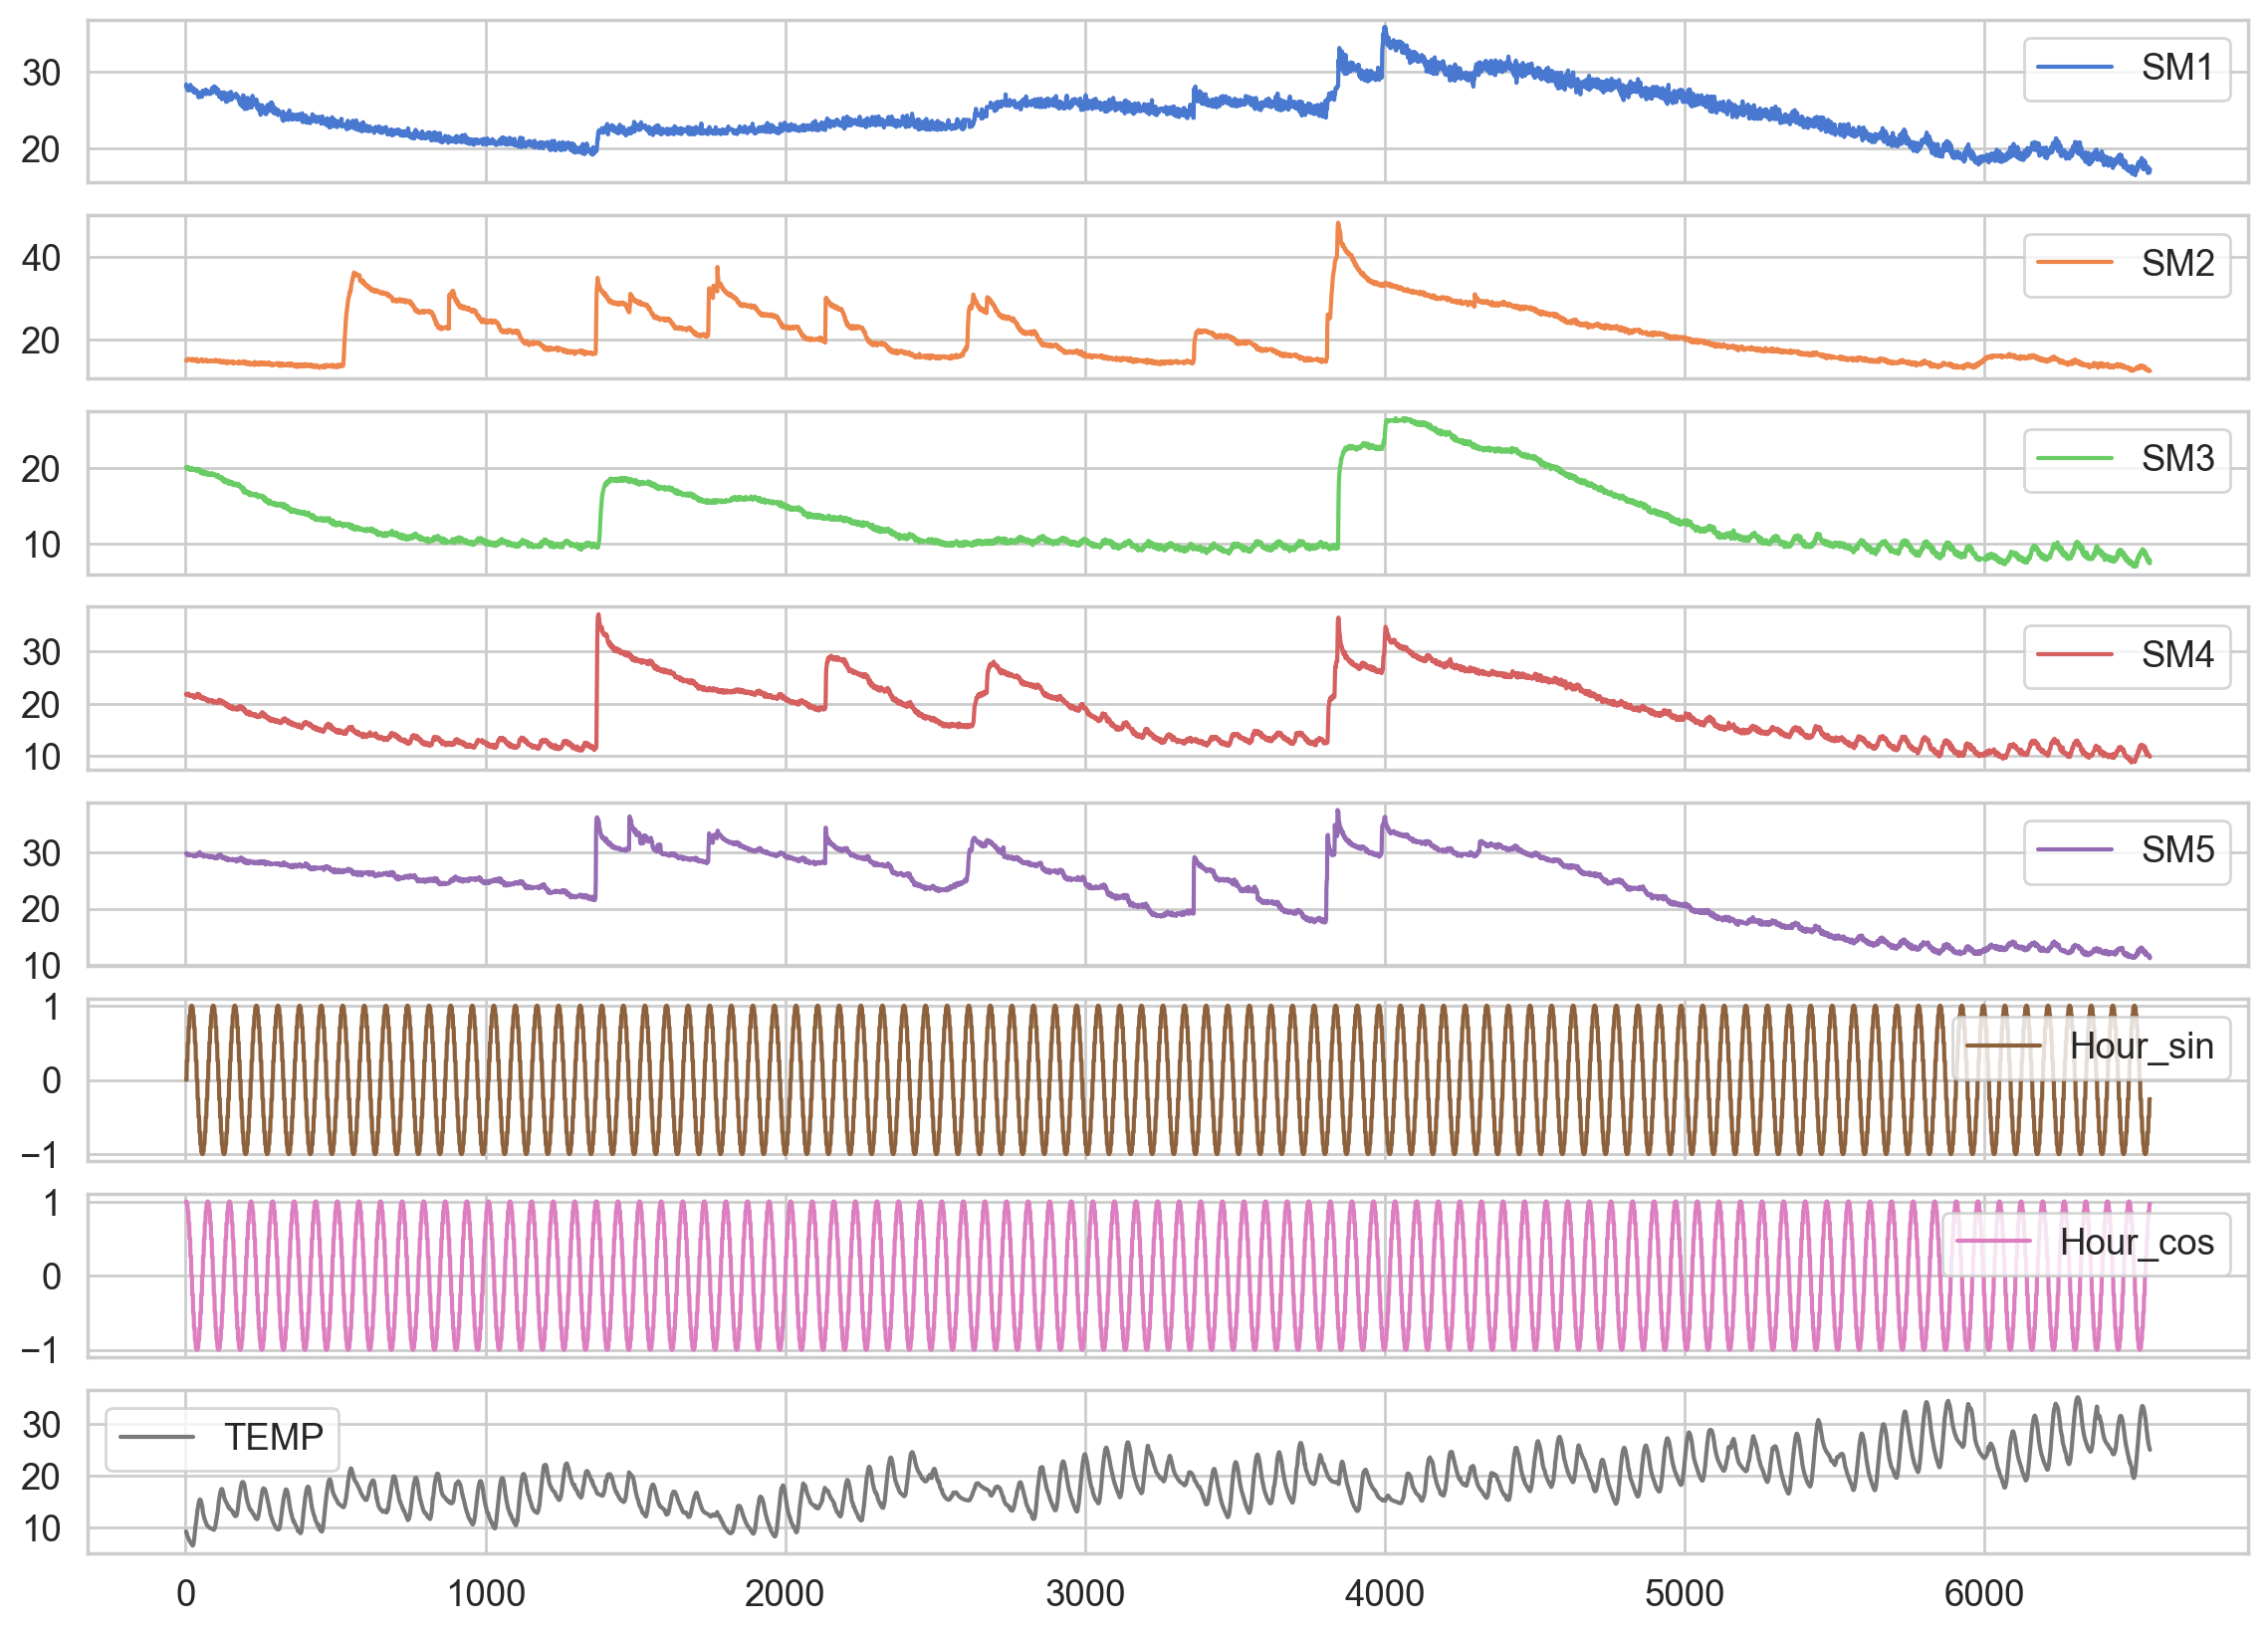

In [21]:
data_sp_multi .plot(subplots=True)


## Feature Enginnering
In this section, for each row we will derive 5 rows, i.e , we will create each instance for each soil moisture sensor. Taking in consideration the 5 soil moisture measures + the globale temperature + the actual time + one sensor position => we should create a function that will guess the soil moisture on that position (Target).
In our reflexion, the fact of involving the position and the microclimate variables to guess the Soil moisture at that position, lead the function to understand the soil propagation phenomenon iterativly

In [ ]:
processed_data = pd.DataFrame()
positions = {"SM1":[75,500], "SM2": [225,500], "SM3": [75,300] , "SM4": [225,300] , "SM5": [225,100]  }
for index, row in data_sp_multi.iterrows() :
    for i in range(5) :
        row["pos_x"]= positions["SM"+str(i+1)][0]
        row["pos_y"]= positions["SM"+str(i+1)][1]
        row["target"] = row["SM"+str(i+1)]
        processed_data = processed_data.append(row, ignore_index=True)
 

In [23]:
processed_data

,SM1,SM2,SM3,SM4,SM5,Hour_sin,Hour_cos,TEMP,pos_x,pos_y,target
0,28.193435,14.848556,20.017364,21.886789,29.843542,0.000000,1.000000,9.189221,75.0,500.0,28.193435
1,28.193435,14.848556,20.017364,21.886789,29.843542,0.000000,1.000000,9.189221,225.0,500.0,14.848556
2,28.193435,14.848556,20.017364,21.886789,29.843542,0.000000,1.000000,9.189221,75.0,300.0,20.017364
3,28.193435,14.848556,20.017364,21.886789,29.843542,0.000000,1.000000,9.189221,225.0,300.0,21.886789
4,28.193435,14.848556,20.017364,21.886789,29.843542,0.000000,1.000000,9.189221,225.0,100.0,29.843542
...,...,...,...,...,...,...,...,...,...,...,...
32755,17.262500,12.330031,7.936324,9.899964,11.365206,-0.258819,0.965926,25.003036,75.0,500.0,17.262500
32756,17.262500,12.330031,7.936324,9.899964,11.365206,-0.258819,0.965926,25.003036,225.0,500.0,12.330031
32757,17.262500,12.330031,7.936324,9.899964,11.365206,-0.258819,0.965926,25.003036,75.0,300.0,7.936324
32758,17.262500,12.330031,7.936324,9.899964,11.365206,-0.258819,0.965926,25.003036,225.0,300.0,9.899964


## Data Normalisation

In [16]:
# scaling function for the microclimate variables
def MinMaxScale(array, min, max):

    return (array - min) / (max - min)

In [24]:
min_SM1 = data_sp_presequence["SM1"].min()
max_SM1 = data_sp_presequence["SM1"].max()
min_SM2 = data_sp_presequence["SM2"].min()
max_SM2 = data_sp_presequence["SM2"].max()
min_SM3 = data_sp_presequence["SM3"].min()
max_SM3 = data_sp_presequence["SM3"].max()
min_SM4 = data_sp_presequence["SM4"].min()
max_SM4 = data_sp_presequence["SM4"].max()
min_SM5 = data_sp_presequence["SM5"].min()
max_SM5 = data_sp_presequence["SM5"].max()
min_TEMP = data_sp_presequence["TEMP"].min()
max_TEMP = data_sp_presequence["TEMP"].max()

processed_data["SM1"] = MinMaxScale(processed_data["SM1"], min_SM1, max_SM1)
processed_data["SM2"] = MinMaxScale(processed_data["SM2"], min_SM2, max_SM2)
processed_data["SM3"] = MinMaxScale(processed_data["SM3"], min_SM3, max_SM3)
processed_data["SM4"] = MinMaxScale(processed_data["SM4"], min_SM4, max_SM4)
processed_data["SM5"] = MinMaxScale(processed_data["SM5"], min_SM5, max_SM5)
processed_data["TEMP"] = MinMaxScale(processed_data["TEMP"], min_TEMP, max_TEMP)


processed_data["pos_x"] = processed_data["pos_x"] / 300 # X are divided by 300 (3 meters) to range it between [0,1]
processed_data["pos_y"] = processed_data["pos_y"] / 600 # Y are divided by 600 (6 meters) to range it between [0,1]

In [25]:
processed_data

,SM1,SM2,SM3,SM4,SM5,Hour_sin,Hour_cos,TEMP,pos_x,pos_y,target
0,0.603513,0.07023,0.669162,0.461873,0.706813,0.000000,1.000000,0.093571,0.25,0.833333,28.193435
1,0.603513,0.07023,0.669162,0.461873,0.706813,0.000000,1.000000,0.093571,0.75,0.833333,14.848556
2,0.603513,0.07023,0.669162,0.461873,0.706813,0.000000,1.000000,0.093571,0.25,0.500000,20.017364
3,0.603513,0.07023,0.669162,0.461873,0.706813,0.000000,1.000000,0.093571,0.75,0.500000,21.886789
4,0.603513,0.07023,0.669162,0.461873,0.706813,0.000000,1.000000,0.093571,0.75,0.166667,29.843542
...,...,...,...,...,...,...,...,...,...,...,...
32755,0.040893,0.00012,0.046128,0.039199,0.007578,-0.258819,0.965926,0.645701,0.25,0.833333,17.262500
32756,0.040893,0.00012,0.046128,0.039199,0.007578,-0.258819,0.965926,0.645701,0.75,0.833333,12.330031
32757,0.040893,0.00012,0.046128,0.039199,0.007578,-0.258819,0.965926,0.645701,0.25,0.500000,7.936324
32758,0.040893,0.00012,0.046128,0.039199,0.007578,-0.258819,0.965926,0.645701,0.75,0.500000,9.899964


## Data Splitting

In [26]:
separate_index = int(processed_data.shape[0] * 0.8)
x_train , y_train = processed_data.iloc[:separate_index, :-1], processed_data.iloc[:separate_index, -1]
x_val , y_val = processed_data.iloc[separate_index:, :-1], processed_data.iloc[separate_index:, -1]

In [27]:
print (f"The X training data shape : {x_train.shape}",
        f"The Y training data shape : {y_train.shape}" ,
       sep='\n')

The X training data shape : (26208, 10)
The Y training data shape : (26208,)


*  The __from_tensor_slices__ function splits the input tensors along the first dimension (rows) to create a dataset of corresponding input-output pairs.
* The dataset is then cached in memory (__cache() function__), shuffled with the specified buffer size using __suffle()__ : that means after the dataset is being cached in memory, it will suffle them and using the __batch()__ function it will take the defined batch size. Lastly, it is set to repeat indefinitely for multiple epochs of training.

In [28]:
# create batches 

BATCH_SIZE = 512
BUFFER_SIZE = 512
EVALUATION_INTERVAL = 200
EPOCHS = 60
PATIENCE = 5

train_data_multiple = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data_multiple = train_data_multiple.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multiple = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_data_multiple = val_data_multiple.batch(BATCH_SIZE).repeat()

<img src="capture.png" alr="NN_structure" />

In [29]:
from tensorflow_addons.metrics import RSquare

multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.Dense(64, input_shape=(10,), activation="tanh"))
multi_step_model.add(tf.keras.layers.Dense(32, activation='tanh'))
multi_step_model.add(tf.keras.layers.Dense(1, activation="relu"))
multi_step_model.compile(loss="mean_squared_error", optimizer="adam",metrics=[RSquare()])
print(multi_step_model.summary())

c:\Users\asus\anaconda3\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning:



TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
for x, y in val_data_multiple.take(1):
    print (multi_step_model.predict(x).shape) # test the predict with the initialised weights to check the output shape

16/16 [==============================] - 0s 12ms/step
(512, 1)


In [ ]:
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
multi_step_history = multi_step_model.fit(train_data_multiple,
                                          epochs=30,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multiple,
                                          validation_steps=EVALUATION_INTERVAL,
                                          callbacks=[early_stopping])

In [60]:
multi_step_model.save("regression_model_mapping")

INFO:tensorflow:Assets written to: regression_model_mapping\assets


INFO:tensorflow:Assets written to: regression_model_mapping\assets


In [35]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()

    plt.show()

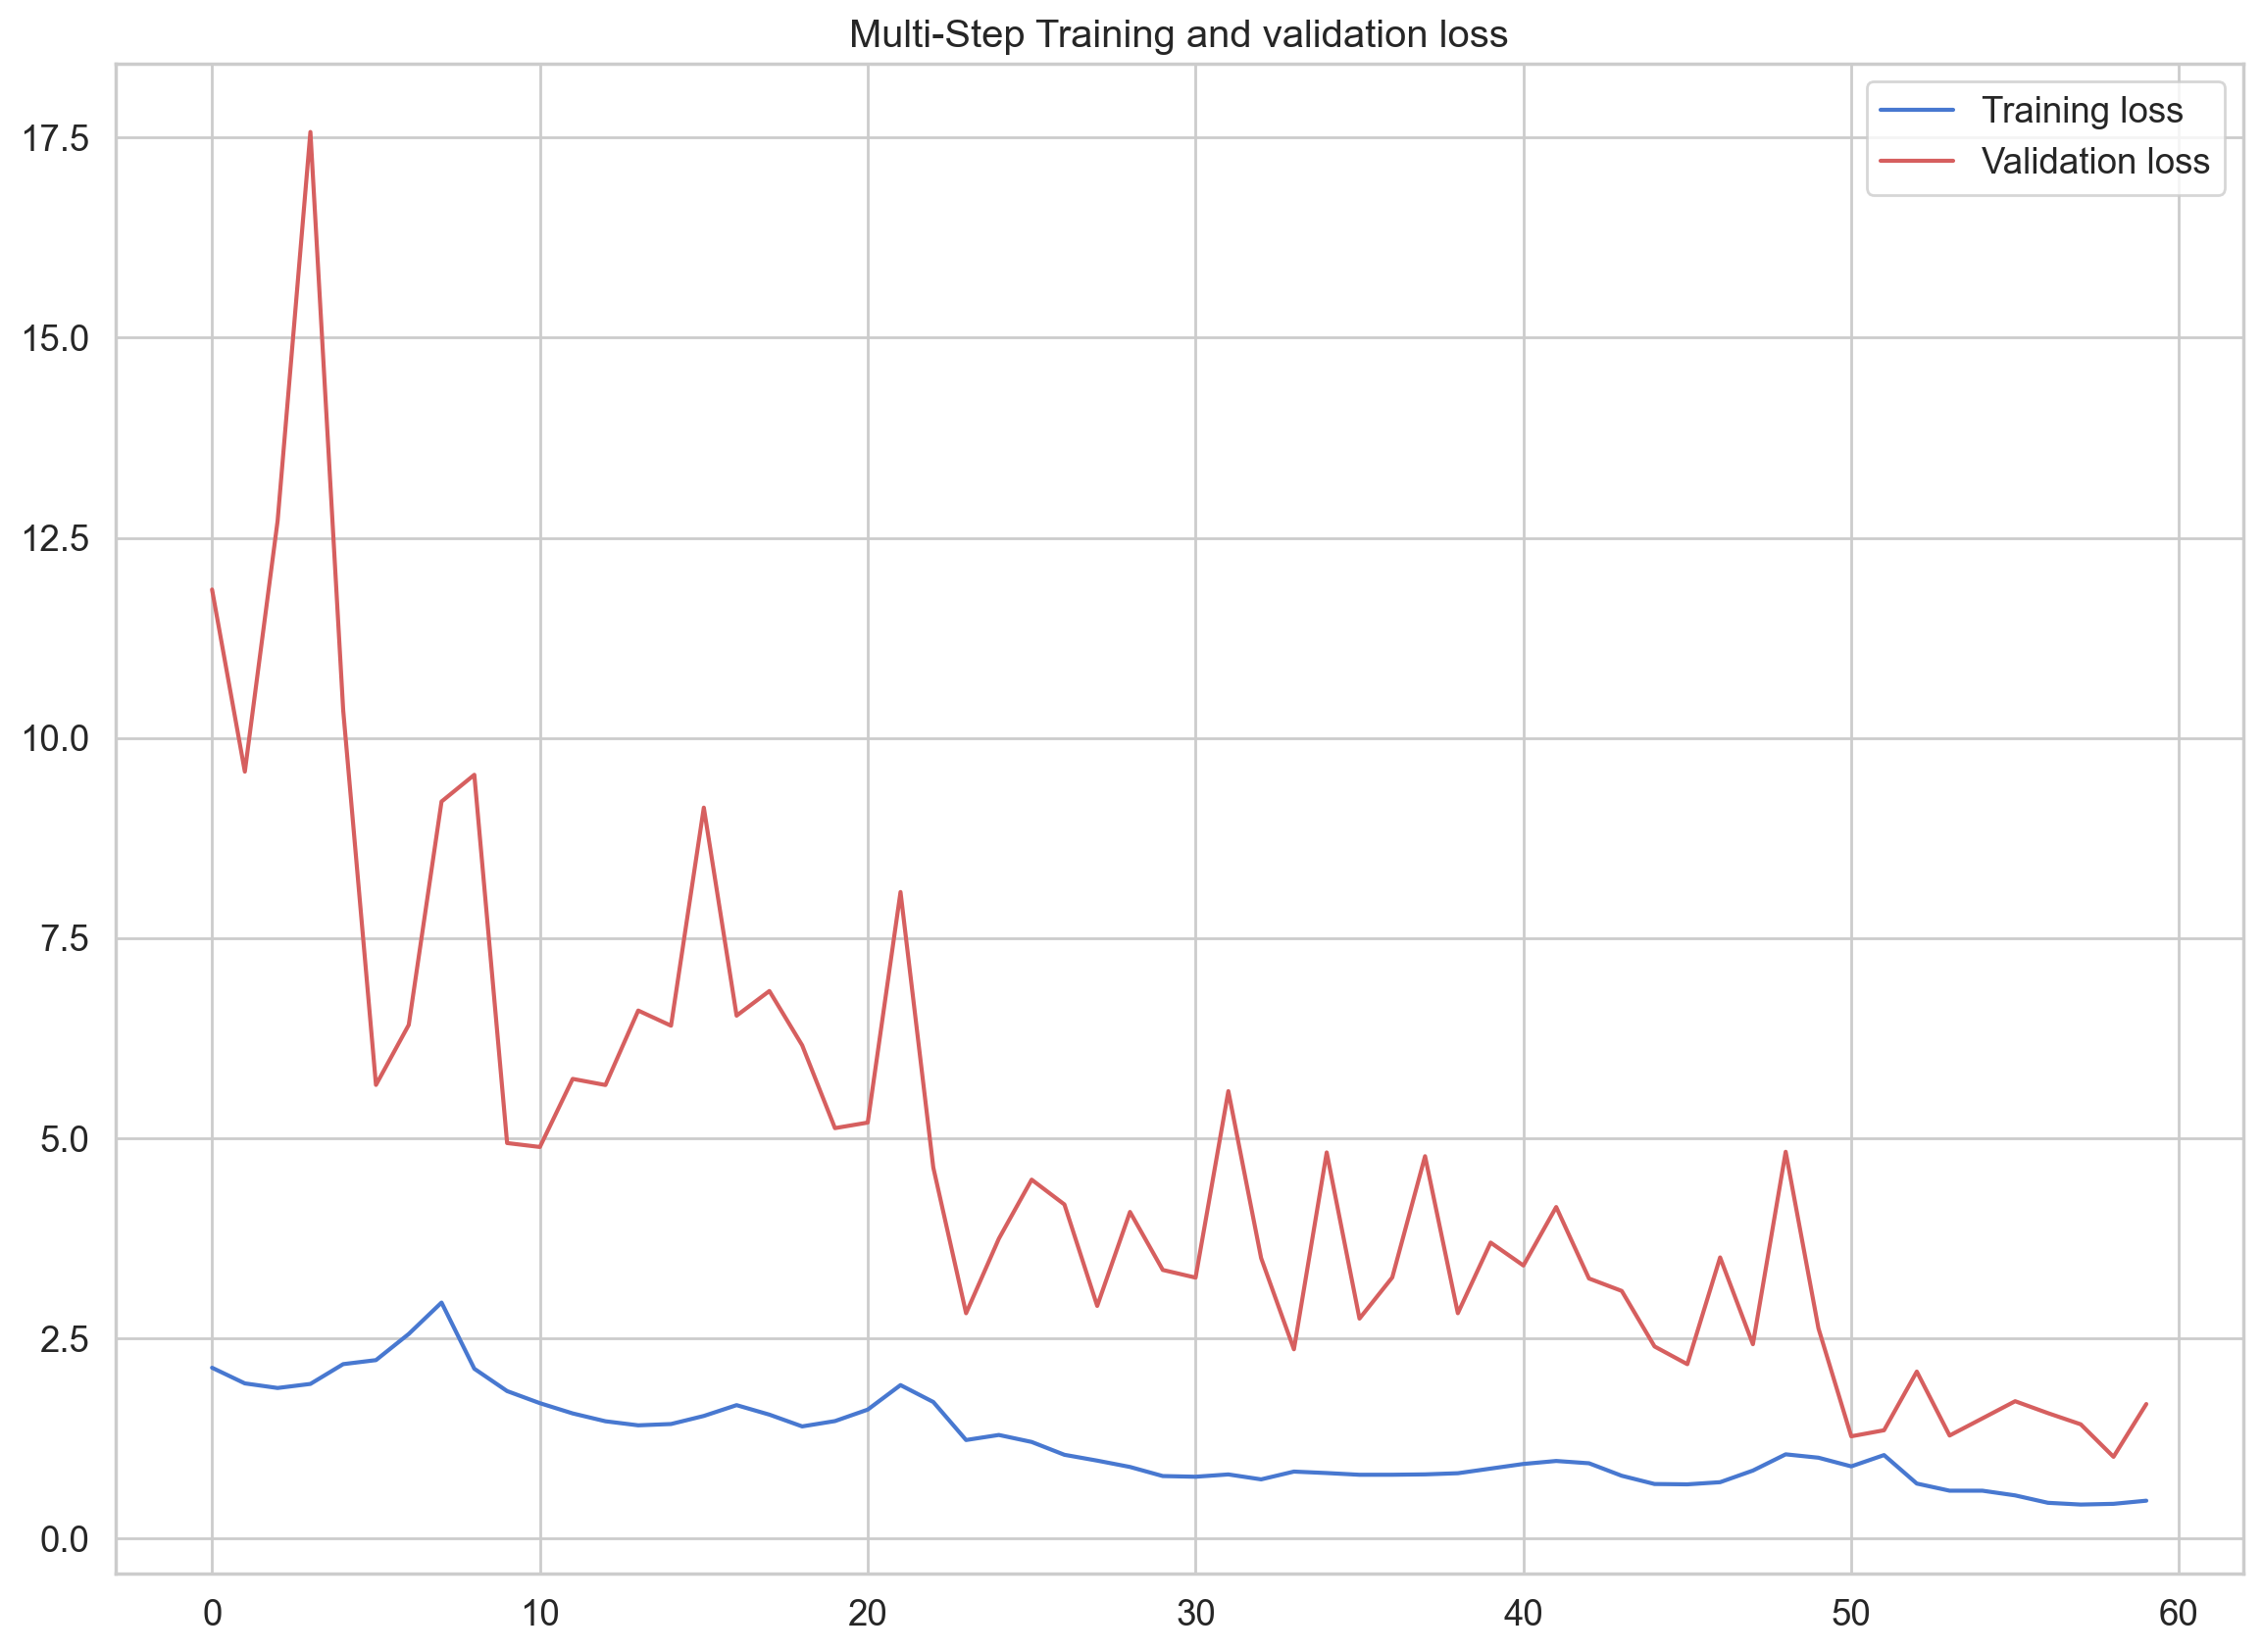

In [36]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')


In [37]:
for x, y in val_data_multiple.take(1):
    pred =  np.reshape( multi_step_model.predict(x), [-1])
    real = np.reshape(y, [-1])
    comparison = pd.DataFrame({"predicted" : pred, "Real" : real , "Difference" :pred-real })

16/16 [==============================] - 0s 2ms/step


In [52]:
row_array = x_val.iloc[0].to_numpy()
batch = row_array.reshape(1, -1)
multi_step_model.predict(batch)[0][0]

1/1 [==============================] - 0s 78ms/step


13.785945

In [54]:
for (i, j) in [(7.5, 50), (22.5, 50), (7.5, 30), (22.5, 30), (22.5, 10)]:
    print(i,j)


7.5 50
22.5 50
7.5 30
22.5 30
22.5 10


In [58]:
matrice_predictions = np.zeros((30, 60))
k = 1
serie = x_val.iloc[0].copy()
serie["SM1"] = MinMaxScale(24, min_SM1, max_SM1)
serie["SM2"] = MinMaxScale(24, min_SM2, max_SM2)
serie["SM3"] = MinMaxScale(24, min_SM3, max_SM3)
serie["SM4"] = MinMaxScale(24, min_SM4, max_SM4)
serie["SM5"] = MinMaxScale(24, min_SM5, max_SM5)

for (i, j) in [(7, 50), (22, 50), (7, 30), (22, 30), (22, 10)]:
    matrice_predictions[i][j] = x_val.iloc[0]["SM" + str(k)]
    k = k + 1
    

for i in range(matrice_predictions.shape[0]):
    for j in range(matrice_predictions.shape[1]):
        if (i, j) in [(7, 50), (22, 50), (7, 30), (22, 30), (22, 10)]:
            pass
        else:
            serie["pos_x"] = i / 30
            serie["pos_y"] = j / 60
            row_array = serie.to_numpy()
            batch = row_array.reshape(1, -1)
            matrice_predictions[i][j] = multi_step_model.predict(batch)[0][0]


1/1 [==============================] - 0s 23ms/step


## Heatmap with the same value at each sensor

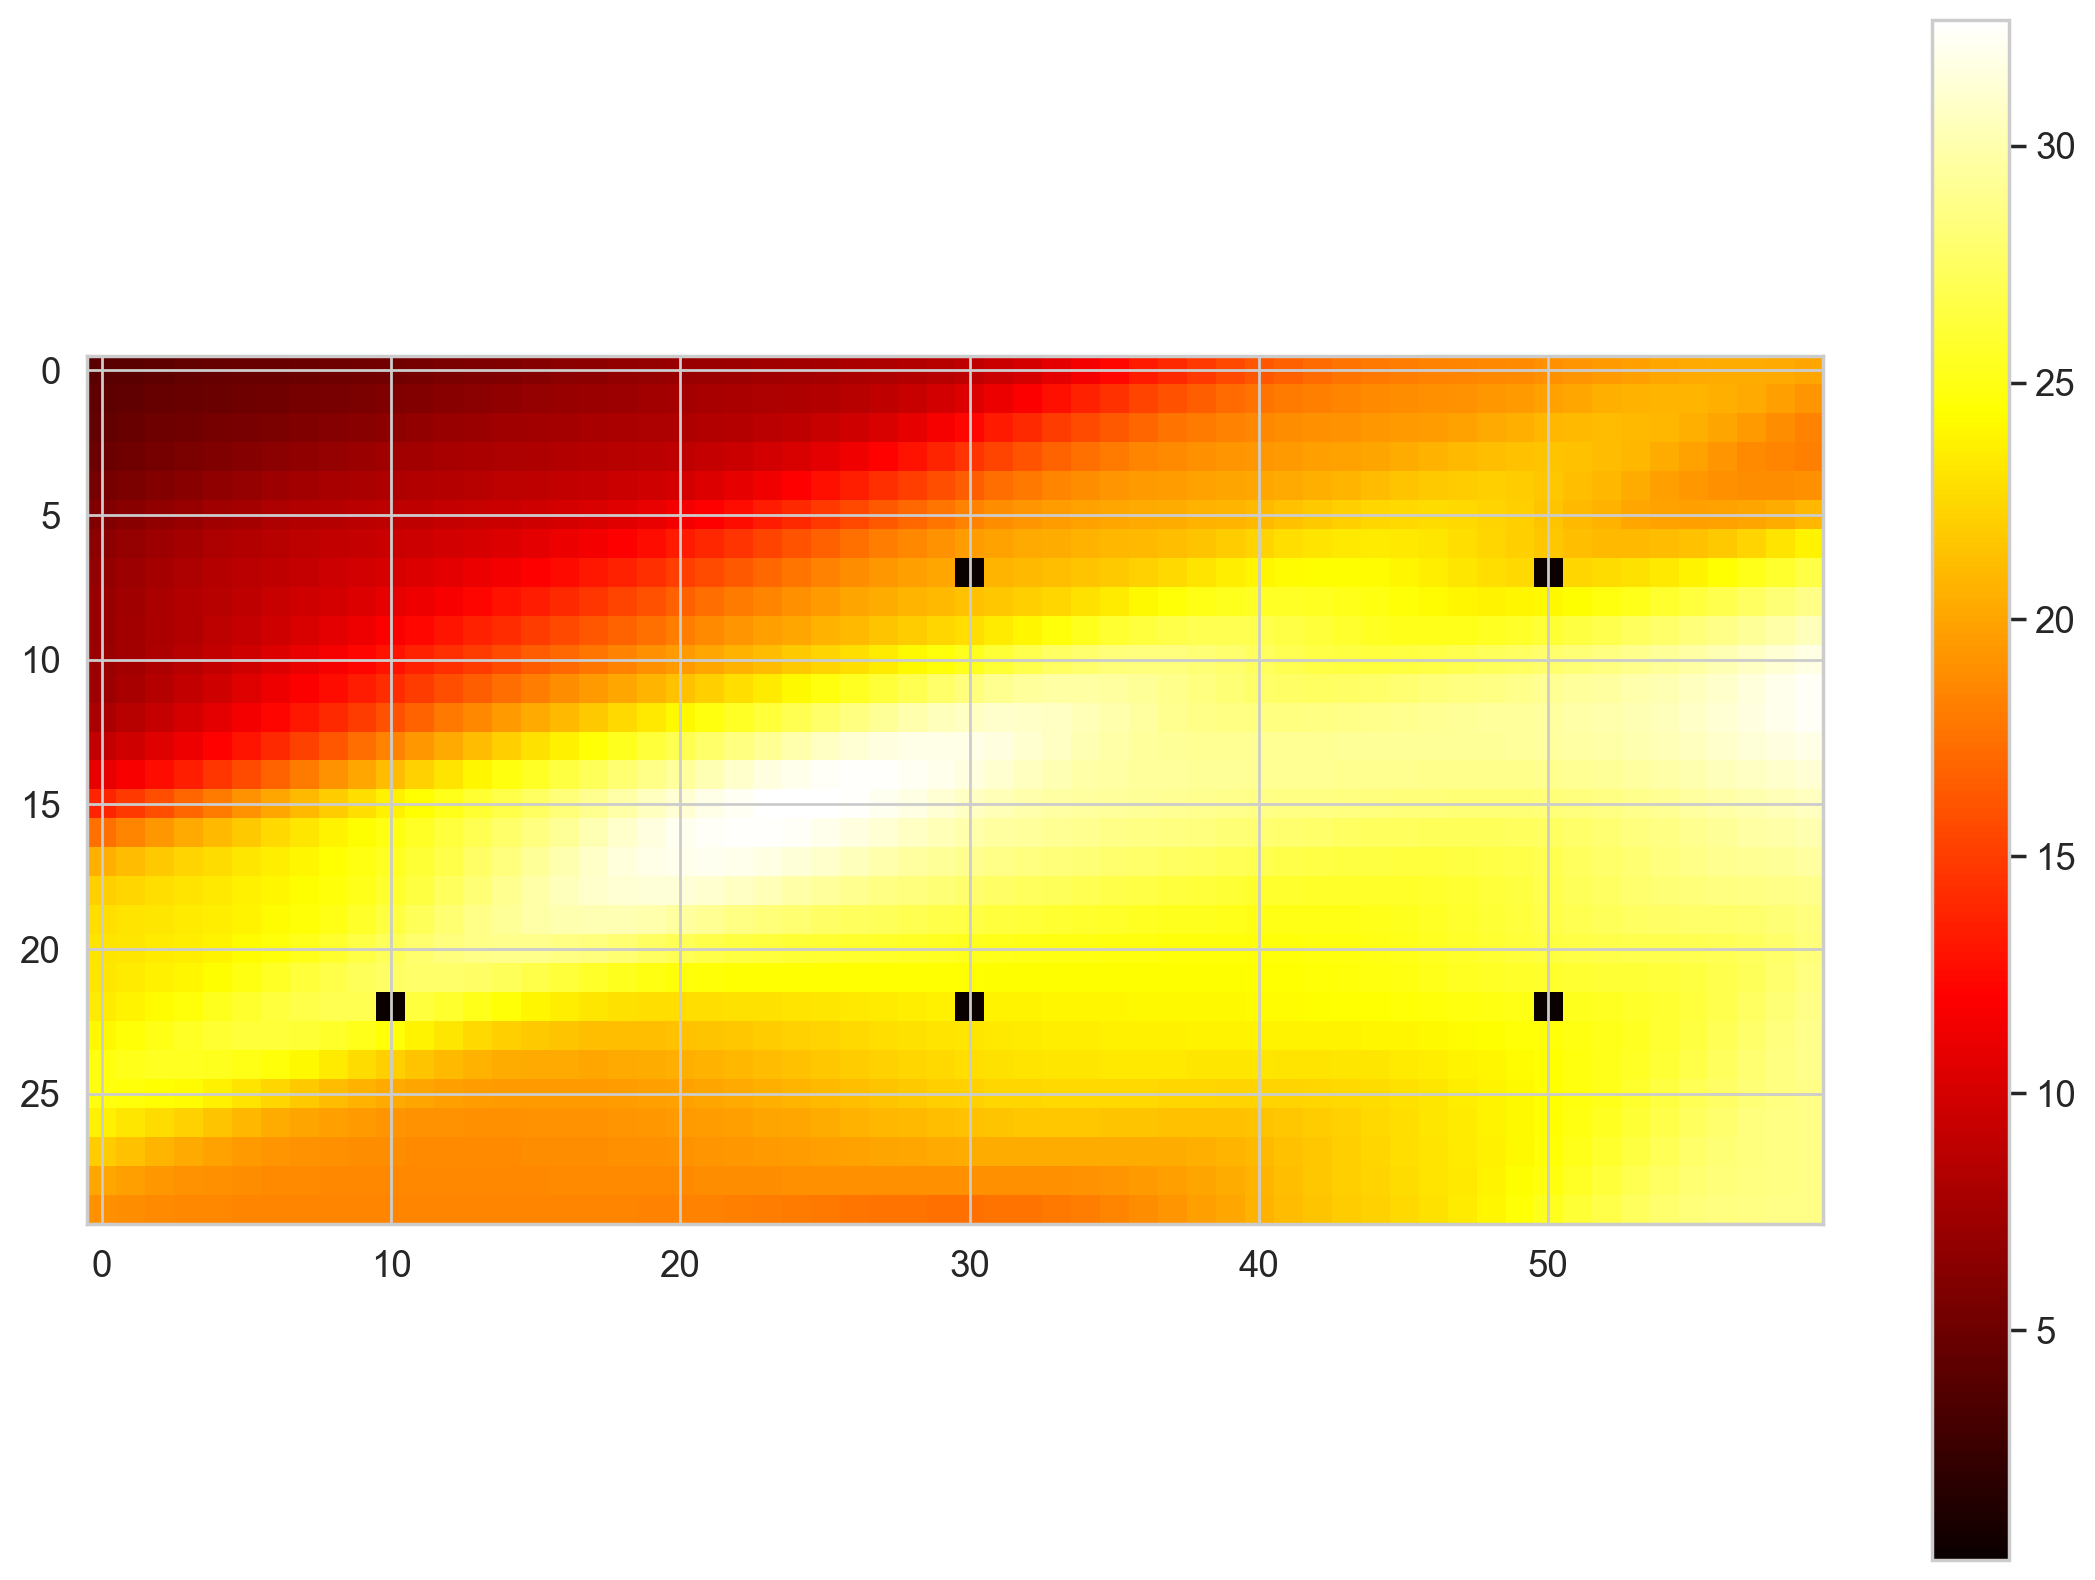

In [59]:
import numpy as np
import matplotlib.pyplot as plt


plt.imshow(matrice_predictions, cmap='hot', interpolation='nearest')
plt.colorbar()  
plt.show()

## Heatmap with different values at each sensor

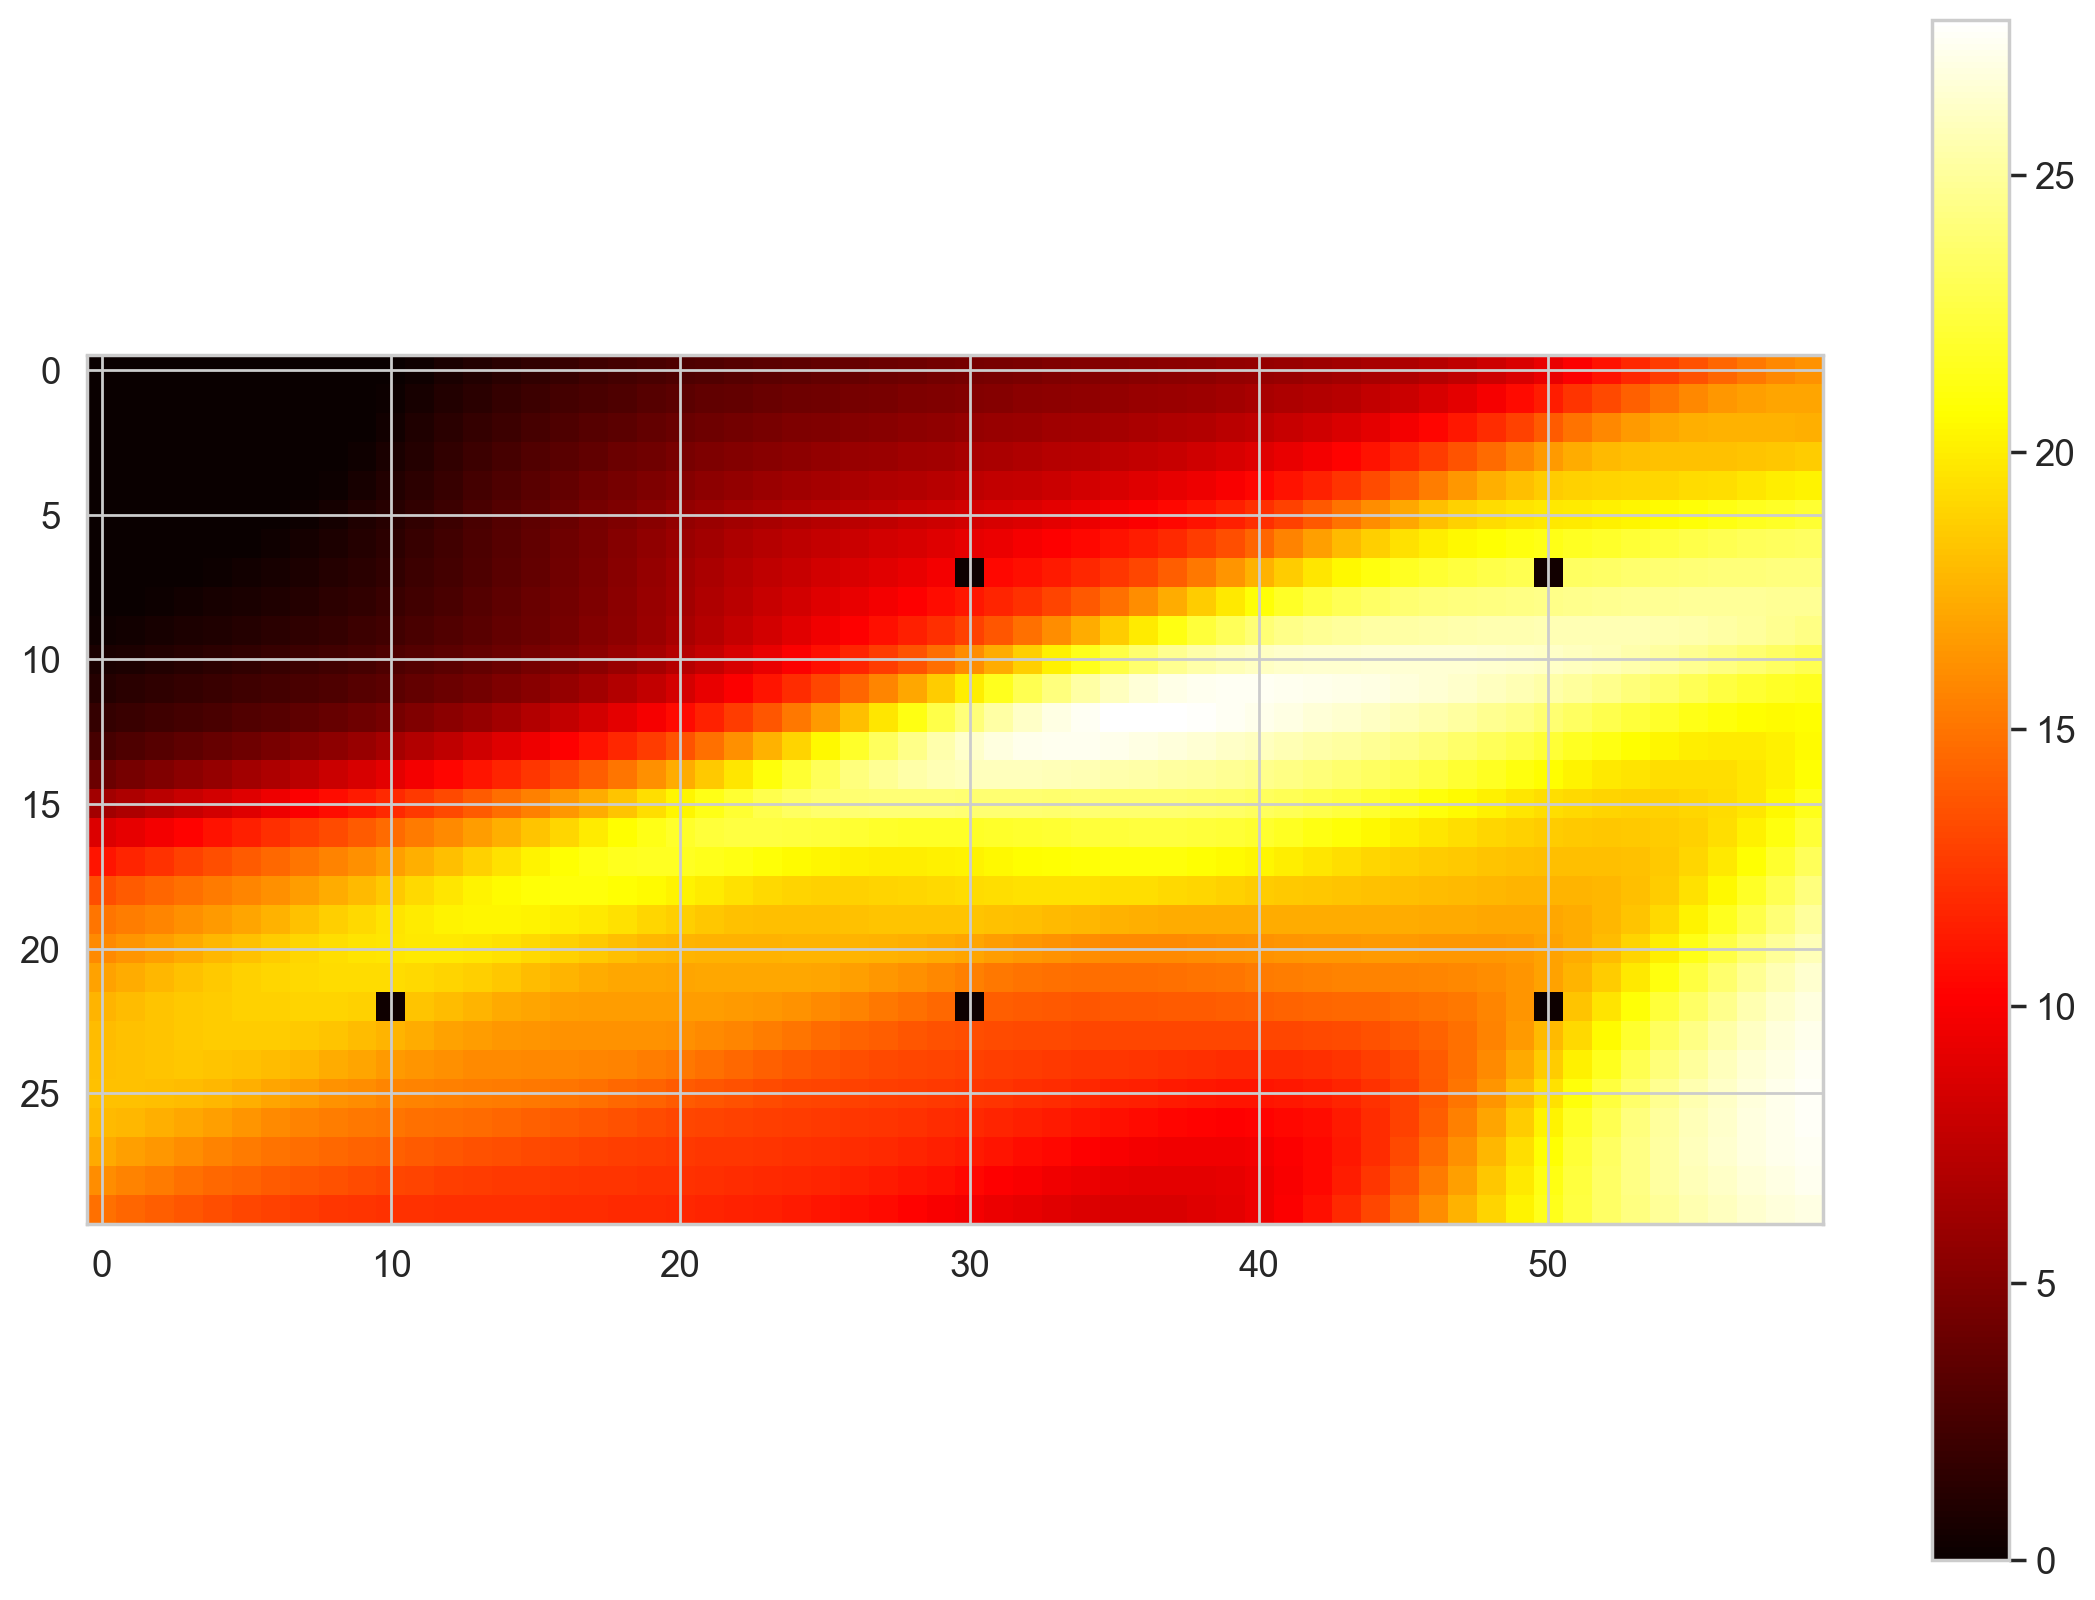

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already calculated the `matrice_predictions` array

# Create the heatmap using matrice_predictions
plt.imshow(matrice_predictions, cmap='hot', interpolation='nearest')
plt.colorbar()  # Add a colorbar to show the scale
plt.show()


## Import model

In [53]:
model_path = 'regression_model_mapping'

# Load the model
multi_step_model = tf.keras.models.load_model(model_path)